In [30]:
import pandas as pd
import numpy as np
import re
import json
import datetime
import os
import matplotlib.pyplot as plt

In [31]:
from food import *
import food
import importlib
importlib.reload(food)

<module 'food' from '/mnt/c/Users/Giacomo/Dropbox/FoodProject/food.py'>

In [32]:
database_path = "/mnt/c/Users/Giacomo/Dropbox/FoodProject/food_database.csv"
diary_path = "/mnt/c/Users/Giacomo/Dropbox/FoodProject/diary_food/"

In [33]:
df_food = food.load_food_database(file_path=database_path)

In [34]:
# find_food(df_food, 'cheese')

In [35]:
recipe = """
87 g blueberry
50 g salmon_smoked
120 g egg_white
1 unit pita_whole
227 g paella_frozen
112 g seafood_frozen
1 unit protein_bar_cookie
1 unit turkey_stick
75 g tomato
0.5 unit pepper_red
125 g onion_yellow
227 g turkey_ground_99_1
1 unit egg
115 g egg_white
1 unit pita_whole
1 unit crab_water
100 g mango_frozen
"""
food.recipe_details(recipe, df_food)

blueberry
salmon_smoked
egg_white
pita_whole
paella_frozen
seafood_frozen
protein_bar_cookie
turkey_stick
tomato
pepper_red
onion_yellow
turkey_ground_99_1
egg
egg_white
pita_whole
crab_water
mango_frozen


Calories          1804.265544
Total_fats          31.781251
Saturated_fats       8.667857
Cholesterol        748.336039
Sodium            3598.743813
Total_carbs        185.607677
Dietary_fibers      21.651696
Sugars              44.906001
Proteins           198.217167
dtype: object

In [36]:
recipe = """
62 g salmon_smoked
4 unit rice_cake_brown
227 g paella_frozen
112 g seafood_frozen
1 unit protein_bar_cookie
227 g turkey_ground_99_1
135 g pasta_whole
75 g tomato
0.5 unit pepper_red
125 g onion_yellow
1.5 scoop protein_powder_ascent_chocolate
130 g greek_yogurt_zero
"""
food.recipe_details(recipe, df_food)

salmon_smoked
rice_cake_brown
paella_frozen
seafood_frozen
protein_bar_cookie
turkey_ground_99_1
pasta_whole
tomato
pepper_red
onion_yellow
protein_powder_ascent_chocolate
greek_yogurt_zero


Calories          1793.27754
Total_fats          24.73652
Saturated_fats         5.925
Cholesterol       460.411669
Sodium            1912.61976
Total_carbs       206.764401
Dietary_fibers     20.827147
Sugars             25.227006
Proteins          195.166324
dtype: object

In [37]:
#food.sum_up_day(df_nutrients, category=None)

blueberry
salmon_smoked
egg_white
pita_whole
paella_frozen
seafood_frozen
protein_bar_cookie
turkey_stick
tomato
pepper_red
onion_yellow
turkey_ground_99_1
egg
egg_white
pita_whole
crab_water
mango_frozen
Breakfast: blueberry, salmon_smoked, egg_white, pita_whole
Lunch: paella_frozen, seafood_frozen
Snack: protein_bar_cookie, turkey_stick
Dinner: tomato, pepper_red, onion_yellow, turkey_ground_99_1, egg, egg_white, pita_whole, crab_water
Night: mango_frozen


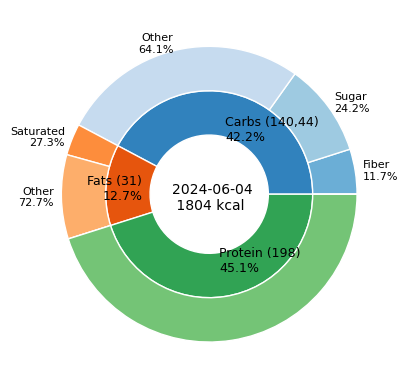

In [38]:
fig, ax = plt.subplots(1,1)
food.plot_pie_given_day(database_path, f"{diary_path}2024-06-04.txt", ax=ax)

cereal_heritage_flakes
milk_whole
carrot
lettuce
beef_korean_bbq
kimchi
mushroom
sauce_gochujang
rice_jasmine
egg_hard_boiled
greek_yogurt_zero_vanilla
mushroom
broccoli
octopus_costco
oil_olive
avocado
pita_whole
cottage_cheese_skim
cheesecake
wine_red
Breakfast: cereal_heritage_flakes, milk_whole
Lunch: carrot, lettuce, beef_korean_bbq, kimchi, mushroom, sauce_gochujang, rice_jasmine
Snack: egg_hard_boiled, greek_yogurt_zero_vanilla
Dinner: mushroom, broccoli, octopus_costco, oil_olive, avocado, pita_whole, cottage_cheese_skim
Night: cheesecake, wine_red
milk_zero
cereal_heritage_flakes
avocado
couscous
broccoli_rabe
egg
potato_red
oil_olive
greek_yogurt_zero
strawberry
protein_bar_chocolate
artichoke_frozen
oil_olive
pasta_lasagna
chicken_breast
egg_hard_boiled
banana
greek_yogurt_zero
protein_powder_ascent_chocolate
Breakfast: milk_zero, cereal_heritage_flakes, avocado
Lunch: couscous, broccoli_rabe, egg, potato_red, oil_olive
Snack: greek_yogurt_zero, strawberry, protein_bar_choco

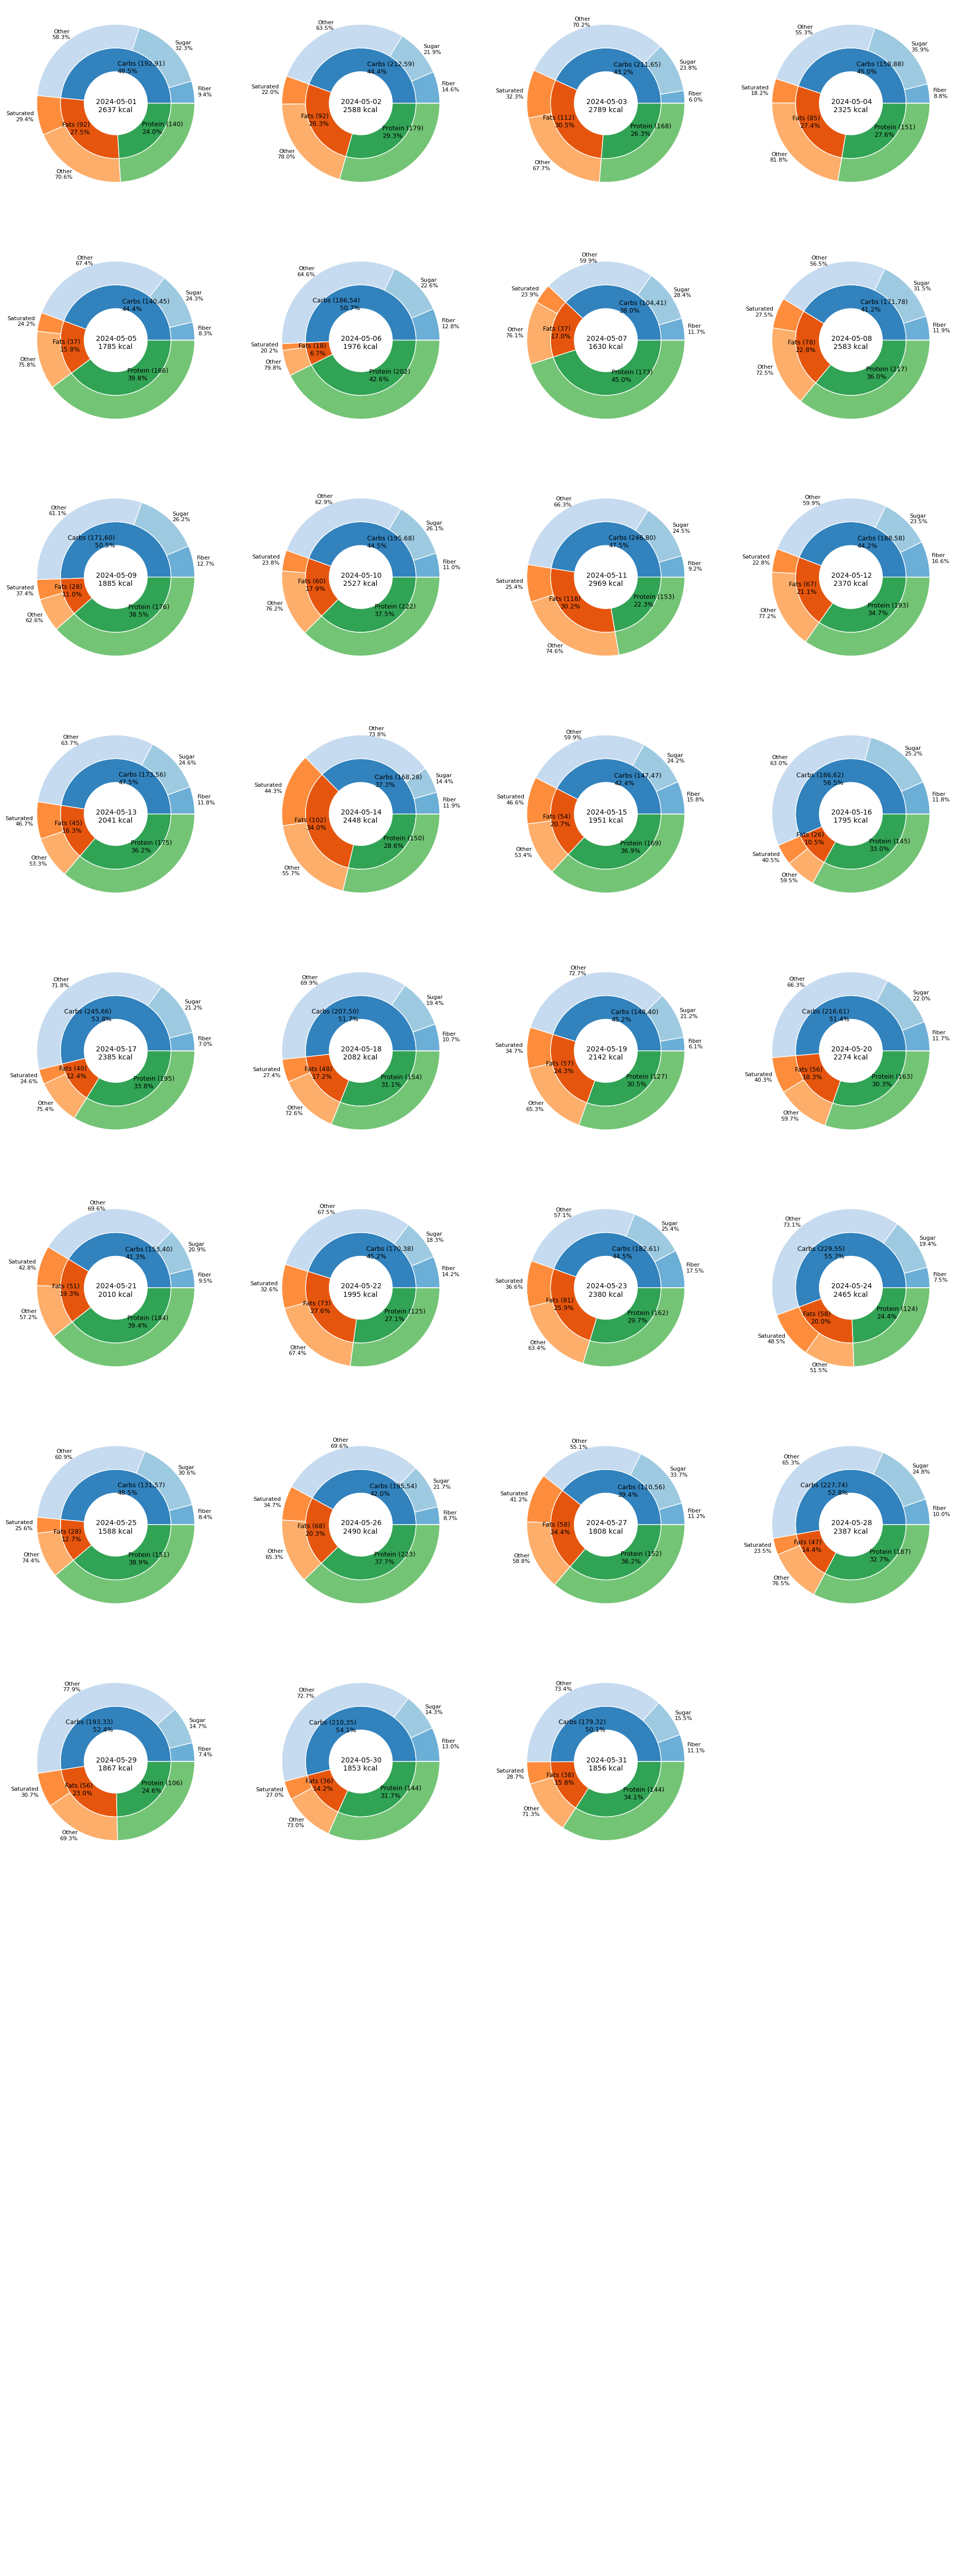

In [39]:
dates = food.generate_dates(start='2024-05-01', end='2024-05-31', year=None, month=None)
N = len(dates)

cols = 4
rows = N // 3
if N % cols > 0: 
    rows += 1

fig, axs = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
for i in range(rows):
    for j in range(cols):
        idx = cols * i + j
        if idx >= N: 
            axs[i,j].set_axis_off()
        else:
            date = dates[idx]
            diary_entry_path = f"{diary_path}{date}.txt"
            if N <= cols:
                food.plot_pie_given_day(database_path, diary_entry_path, axs[j])
            else: 
                food.plot_pie_given_day(database_path, diary_entry_path, axs[i,j])
    